In [39]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [38]:
solar_data = pd.read_csv('Test system portfolio (1).csv')

In [40]:
solar_data.head()

,State,System Size (kW),Estimated Year 1 Production (kWh)
0,AZ,8.16,13242
1,AZ,6.48,9933
2,AZ,6.18,8805
3,AZ,7.12,11630
4,AZ,3.97,6619


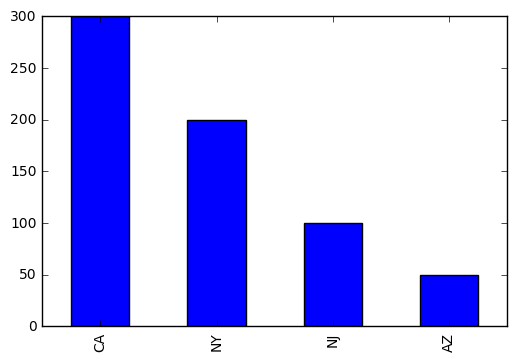

In [41]:

#simple plot of solar system count
system_counts = solar_data['State'].value_counts()
system_counts.plot(kind='bar')

In [42]:

#use pandas to group the data
state_sum = solar_data.groupby('State').sum()
state_sum

,System Size (kW),Estimated Year 1 Production (kWh)
State,,
AZ,317.75,488178
CA,2030.02,2949146
NJ,719.49,886761
NY,1474.07,1760111


In [402]:

#calculate incentive payment
state_sum_size = state_sum.drop(['Estimated Year 1 Production (kWh)'], axis=1)
state_sum_size

State_sum__size_array = state_sum_size.as_matrix()

AZ_Ini_Pay = 1.25
CA_Ini_Pay = 1.75
NY_Ini_Pay = 1.50
NJ_Ini_Pay = 1.25

AZ_Incentive = State_sum__size_array[0]*AZ_Ini_Pay
print (AZ_Incentive)
CA_Incentive = State_sum__size_array[1]*CA_Ini_Pay
print (CA_Incentive)
NJ_Incentive = State_sum__size_array[2]*NJ_Ini_Pay
print (NJ_Incentive)
NY_Incentive = State_sum__size_array[3]*NY_Ini_Pay
print (NY_Incentive)
Total_Init_Pay =(AZ_Incentive+CA_Incentive+NJ_Incentive+NY_Incentive)*1000
Total_Init_Pay

[ 397.1875]
[ 3552.535]
[ 899.3625]
[ 2211.105]


array([ 7060190.])

In [356]:
#per system cost
system_counts_array = system_counts.as_matrix()
CA = system_counts_array[0]
NY = system_counts_array[1]
NJ = system_counts_array[2]
AZ = system_counts_array[3]
Total_System = (CA+NY+NJ+AZ)*2500
Total_System

300


1625000

In [424]:
#calculate expenses at interconnection
overhead = 500,000.00
AZ_Inst = 2.25
CA_Inst = 2.75
NY_Inst = 2.50
NJ_Inst = 2.50


 #Variable installation cost
AZ_Install = State_sum__size_array[0]*AZ_Inst
CA_Install = State_sum__size_array[1]*CA_Inst
NJ_Install = State_sum__size_array[2]*NJ_Inst
NY_Install = State_sum__size_array[3]*NY_Inst
Total_Install =(AZ_Install+CA_Install+NJ_Install+NY_Install)*1000
Total_Install

[ 1798.725]


array([ 11781392.5])

In [412]:



#change the rate here to change output, note to run the entire code block or it will not work
rate = .029

#clean the data, drop column
state_sum_new = state_sum.drop(['System Size (kW)'], axis=1)
state_sum_new

#convert to array 
State_sum_array = state_sum_new.as_matrix()
AZ = 0.100
CA = 0.150
NY = 0.140
NJ = 0.120

#calculate monthly payments
AZ_Monthly = State_sum_array[0]*AZ
CA_Monthly = State_sum_array[1]*CA
NJ_Monthly = State_sum_array[2]*NJ
NY_Monthly = State_sum_array[3]*NY
Total = (AZ_Monthly+CA_Monthly+NJ_Monthly+NY_Monthly)/12
Total_Monthly = Total[0]



#this defines the iterable
class Payments:
    def __init__(self, n):
        self.i = 0
        self.n = n

    def __iter__(self):
        return self

    def __next__(self):
        if self.i < self.n:
            i = self.i
            self.i += 1
            return i
        else:
            raise StopIteration()
Total_Monthly_Payments = []
p = Payments(21)
for i in p:
        Growth_Rate = Total_Monthly*(1+rate)**(i)
        Total_Monthly_Payments.append(Growth_Rate)

In [421]:

#This adds in multiples counts for the monthly values so we can discount monthly    
Total_Payments = Total_Monthly_Payments[:]
Total_Payments.extend(Total_Monthly_Payments*11)
Total_Payments.sort()

#check payment output
#print (Total_Payments)
#check count
#print (len(Total_Payments))
np.npv(0.00416666667,Total_Payments)



14117245.298016639

In [423]:
AZ_kW = State_sum__size_array[0]
CA_kW = State_sum__size_array[1]
NJ_kW = State_sum__size_array[2]
NY_kW = State_sum__size_array[3]
Totals = (AZ_kW+CA_kW+NJ_kW+NY_kW)
Total_kW =Totals[0]

#check for Total_kW accuracy
#print (Total_kW)
#Note that Python Indexes at Zero so payment starts inception
#this calculates the growth rate (1+r)^n
rate = 0.015
Ongoing_expenses = [0]
p = Payments(21)
for i in p:
        Growth_Rate_Exp = 10*Total_kW*(1+rate)**(i)
        Ongoing_expenses.append(Growth_Rate_Exp)
np.npv(0.05,Ongoing_expenses)

4541.33


660834.91678393329

In [393]:
#incentive payment at interconnection + total present value of cash flows
PV = 14117245.303457618+7060190
print (PV)

21177435.303457618


In [292]:
#installation cost + origination cost + general overhead
Cost=11781392.5 + 1625000 + 500000
print (Cost)

13906392.5


In [390]:
#total expense
total_exp = 13906392.5 + 660834.91678393329
print (total_exp)

14567227.416783933


In [391]:
#net present value
NPV = 21177435.303457618 - 14567227.416783933
print (NPV)

6610207.886673685
